<a href="https://colab.research.google.com/github/ManasviAtGitHub/Business-Intelligence/blob/main/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Load the dataset
data = fetch_20newsgroups()
# Get the text categories
text_categories = data.target_names
# define the training set
train_data = fetch_20newsgroups(subset="train", categories=text_categories)
# define the test set
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

In [ ]:
print("We have {} unique classes".format(len(text_categories)))
print("We have {} training samples".format(len(train_data.data)))
print("We have {} test samples".format(len(test_data.data)))

We have 20 unique classes
We have 11314 training samples
We have 7532 test samples


In [ ]:
print(test_data.data[1])

From: Rick Miller <rick@ee.uwm.edu>
Subject: X-Face?
Organization: Just me.
Lines: 17
Distribution: world
NNTP-Posting-Host: 129.89.2.33
Summary: Go ahead... swamp me.  <EEP!>

I'm not familiar at all with the format of these "X-Face:" thingies, but
after seeing them in some folks' headers, I've *got* to *see* them (and
maybe make one of my own)!

I've got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")
and I've managed to compile [un]compface too... but now that I'm *looking*
for them, I can't seem to find any X-Face:'s in anyones news headers!  :-(

Could you, would you, please send me your "X-Face:" header?

I *know* I'll probably get a little swamped, but I can handle it.

	...I hope.

Rick Miller  <rick@ee.uwm.edu> | <ricxjo@discus.mil.wi.us>   Ricxjo Muelisto
Send a postcard, get one back! | Enposxtigu bildkarton kaj vi ricevos alion!
          RICK MILLER // 16203 WOODS // MUSKEGO, WIS. 53150 // USA



In [ ]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(train_data.data, train_data.target)
# Predict the categories of the test data
predicted_categories = model.predict(test_data.data)

In [ ]:
print(np.array(test_data.target_names)[predicted_categories])

['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


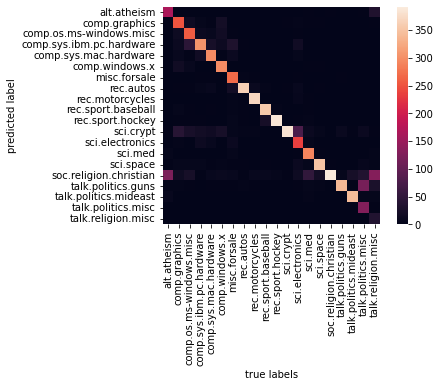

The accuracy is 0.7738980350504514


In [ ]:
# plot the confusion matrix
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square = True, annot=False, fmt = "d", xticklabels=train_data.target_names,yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(test_data.target, predicted_categories)))

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Datasets/

/content/drive/MyDrive/Datasets


In [ ]:
import pandas as pd
emails = pd.read_csv('emails.csv')

In [ ]:
emails[:10]

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [ ]:
def process_email(text):
    text = text.lower()
    return list(set(text.split()))

emails['words'] = emails['text'].apply(process_email)

In [ ]:
emails[:10]

,text,spam,words
0,Subject: naturally irresistible your corporate...,1,"[all, it, _, letsyou, company, structure, nowa..."
1,Subject: the stock trading gunslinger fanny i...,1,"[subject:, edt, mcdougall, duane, penultimate,..."
2,Subject: unbelievable new homes made easy im ...,1,"[all, website, in, subject:, form, fixed, unco..."
3,Subject: 4 color printing special request add...,1,"[626, ramsey, subject:, form, information, ca,..."
4,"Subject: do not have money , get software cds ...",1,"[all, yet, marriage, it, subject:, me, from, h..."
5,"Subject: great nnews hello , welcome to medzo...",1,"[pleased, allusion, sh, subject:, welcome, in,..."
6,Subject: here ' s a hot play in motion homela...,1,"[identify, officer, trapped, over, pubiic, cas..."
7,Subject: save your money buy getting this thin...,1,"[than, yet, cannot, imagine, subject:, it, rea..."
8,Subject: undeliverable : home based business f...,1,"[+, 000, s, jan, mtpi, 23, name, following, is..."
9,Subject: save your money buy getting this thin...,1,"[than, yet, cannot, imagine, subject:, it, rea..."


In [ ]:
num_emails = len(emails)
num_spam = sum(emails['spam'])

print("Number of emails:", num_emails)
print("Number of spam emails:", num_spam)
print()

# Calculating the prior probability that an email is spam
print("Probability of spam:", num_spam/num_emails)

Number of emails: 5728
Number of spam emails: 1368

Probability of spam: 0.2388268156424581


In [ ]:
model = {}

# Training process
for index, email in emails.iterrows():
    for word in email['words']:
        if word not in model:
            model[word] = {'spam': 1, 'ham': 1}
        if word in model:
            if email['spam']:
                model[word]['spam'] += 1
            else:
                model[word]['ham'] += 1

In [ ]:
model['lottery']

{'ham': 1, 'spam': 9}

In [ ]:
model['sale']

{'ham': 42, 'spam': 39}

In [ ]:
def predict_bayes(word):
    word = word.lower()
    num_spam_with_word = model[word]['spam']
    num_ham_with_word = model[word]['ham']
    return 1.0*num_spam_with_word/(num_spam_with_word + num_ham_with_word)

In [ ]:
predict_bayes('lottery')

0.9

In [ ]:
predict_bayes('sale')

0.48148148148148145

In [ ]:
def predict_naive_bayes(email):
    total = len(emails)
    num_spam = sum(emails['spam'])
    num_ham = total - num_spam
    email = email.lower()
    words = set(email.split())
    spams = [1.0]
    hams = [1.0]
    for word in words:
        if word in model:
            spams.append(model[word]['spam']/num_spam*total)
            hams.append(model[word]['ham']/num_ham*total)
    prod_spams = np.compat.long(np.prod(spams)*num_spam)
    prod_hams = np.compat.long(np.prod(hams)*num_ham)
    return prod_spams/(prod_spams + prod_hams)

In [ ]:
predict_naive_bayes('lottery sale')

0.9638144992048691

In [ ]:
predict_naive_bayes('Hi mom how are you')

0.12554358867164467

In [ ]:
predict_naive_bayes('Hi MOM how aRe yoU afdjsaklfsdhgjasdhfjklsd')

0.12554358867164467

In [ ]:
predict_naive_bayes('meet me at the lobby of the hotel at 9:00 am')

3.9335228290584857e-05

In [ ]:
predict_naive_bayes('enter the lottery to win three million dollars')

0.9995234218677428